In [1]:
"""
Script to investigate seasonal bias in fire data and provide alternative seasonal definitions
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def investigate_seasonal_bias():
    """
    Investigate the seasonal distribution and suggest corrections
    """
    
    # Load the fire data
    final_fire_df = pd.read_parquet('final_fire_df.parquet')
    
    print("SEASONAL BIAS INVESTIGATION")
    print(f"Total fires: {len(final_fire_df):,}")
    print(f"Date range: {final_fire_df['acq_date'].min()} to {final_fire_df['acq_date'].max()}")
    
    # Current seasonal distribution
    print("\nCurrent Seasonal Distribution")
    seasonal_counts = final_fire_df['season'].value_counts()
    seasonal_pct = (seasonal_counts / len(final_fire_df) * 100).round(1)
    for season in seasonal_counts.index:
        print(f"{season}: {seasonal_counts[season]:,} fires ({seasonal_pct[season]}%)")
    
    # Monthly breakdown
    print("\nMonthly Fire Distribution")
    monthly_counts = final_fire_df['acq_date'].dt.month.value_counts().sort_index()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    for month in range(1, 13):
        count = monthly_counts.get(month, 0)
        pct = (count / len(final_fire_df) * 100)
        print(f"{month_names[month-1]}: {count:,} fires ({pct:.1f}%)")
    
    # Analyze by year to identify major fire events
    print("\nYearly Fire Distribution")
    yearly_counts = final_fire_df['acq_date'].dt.year.value_counts().sort_index()
    for year in yearly_counts.index:
        count = yearly_counts[year]
        print(f"{year}: {count:,} fires")
    
    # Alternative seasonal definitions for Australia
    print("\nALTERNATIVE SEASONAL DEFINITIONS")
    
    # Standard Australian meteorological seasons
    aus_seasons = {
        12: 'Summer', 1: 'Summer', 2: 'Summer',
        3: 'Autumn', 4: 'Autumn', 5: 'Autumn',
        6: 'Winter', 7: 'Winter', 8: 'Winter',
        9: 'Spring', 10: 'Spring', 11: 'Spring'
    }
    
    # Fire season based definition (more relevant for Victoria)
    fire_seasons = {
        12: 'Peak_Fire', 1: 'Peak_Fire', 2: 'Peak_Fire', 3: 'Late_Fire',
        4: 'Post_Fire', 5: 'Post_Fire', 6: 'Low_Fire', 7: 'Low_Fire',
        8: 'Pre_Fire', 9: 'Pre_Fire', 10: 'Early_Fire', 11: 'Early_Fire'
    }
    
    # Test alternative definitions
    final_fire_df_copy = final_fire_df.copy()
    
    # Australian meteorological seasons
    final_fire_df_copy['aus_season'] = final_fire_df_copy['acq_date'].dt.month.map(aus_seasons)
    aus_seasonal_counts = final_fire_df_copy['aus_season'].value_counts()
    print("\n--- Australian Meteorological Seasons ---")
    for season in ['Summer', 'Autumn', 'Winter', 'Spring']:
        count = aus_seasonal_counts.get(season, 0)
        pct = (count / len(final_fire_df_copy) * 100)
        print(f"{season}: {count:,} fires ({pct:.1f}%)")
    
    # Fire season based classification
    final_fire_df_copy['fire_season'] = final_fire_df_copy['acq_date'].dt.month.map(fire_seasons)
    fire_seasonal_counts = final_fire_df_copy['fire_season'].value_counts()
    print("\n--- Fire Season Based Classification ---")
    season_order = ['Peak_Fire', 'Late_Fire', 'Post_Fire', 'Low_Fire', 'Pre_Fire', 'Early_Fire']
    for season in season_order:
        count = fire_seasonal_counts.get(season, 0)
        pct = (count / len(final_fire_df_copy) * 100)
        print(f"{season}: {count:,} fires ({pct:.1f}%)")
    
    return final_fire_df_copy

def plot_temporal_analysis(df):
    """
    Create comprehensive temporal analysis plots
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Monthly distribution
    monthly_counts = df['acq_date'].dt.month.value_counts().sort_index()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    axes[0,0].bar(range(1, 13), [monthly_counts.get(i, 0) for i in range(1, 13)])
    axes[0,0].set_xticks(range(1, 13))
    axes[0,0].set_xticklabels(month_names, rotation=45)
    axes[0,0].set_title('Monthly Fire Distribution')
    axes[0,0].set_ylabel('Number of Fires')
    
    # Yearly distribution
    yearly_counts = df['acq_date'].dt.year.value_counts().sort_index()
    axes[0,1].bar(yearly_counts.index, yearly_counts.values)
    axes[0,1].set_title('Yearly Fire Distribution')
    axes[0,1].set_ylabel('Number of Fires')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Fire season classification
    fire_seasonal_counts = df['fire_season'].value_counts()
    axes[1,0].pie(fire_seasonal_counts.values, labels=fire_seasonal_counts.index, autopct='%1.1f%%')
    axes[1,0].set_title('Fire Season Classification')
    
    # Australian meteorological seasons
    aus_seasonal_counts = df['aus_season'].value_counts()
    axes[1,1].pie(aus_seasonal_counts.values, labels=aus_seasonal_counts.index, autopct='%1.1f%%')
    axes[1,1].set_title('Australian Meteorological Seasons')
    
    plt.tight_layout()
    plt.savefig('./visualizations/temporal_analysis_corrected.png', dpi=300, bbox_inches='tight')
    plt.show()

df_analyzed = investigate_seasonal_bias()

SEASONAL BIAS INVESTIGATION
Total fires: 8,140
Date range: 2021-01-19 00:00:00 to 2023-12-23 00:00:00

Current Seasonal Distribution
Autumn: 7,312 fires (89.8%)
Summer: 437 fires (5.4%)
Spring: 344 fires (4.2%)
Winter: 47 fires (0.6%)

Monthly Fire Distribution
Jan: 27 fires (0.3%)
Feb: 111 fires (1.4%)
Mar: 2,392 fires (29.4%)
Apr: 4,389 fires (53.9%)
May: 531 fires (6.5%)
Jun: 14 fires (0.2%)
Jul: 4 fires (0.0%)
Aug: 29 fires (0.4%)
Sep: 99 fires (1.2%)
Oct: 192 fires (2.4%)
Nov: 53 fires (0.7%)
Dec: 299 fires (3.7%)

Yearly Fire Distribution
2021: 3,027 fires
2022: 2,191 fires
2023: 2,922 fires

ALTERNATIVE SEASONAL DEFINITIONS

--- Australian Meteorological Seasons ---
Summer: 437 fires (5.4%)
Autumn: 7,312 fires (89.8%)
Winter: 47 fires (0.6%)
Spring: 344 fires (4.2%)

--- Fire Season Based Classification ---
Peak_Fire: 437 fires (5.4%)
Late_Fire: 2,392 fires (29.4%)
Post_Fire: 4,920 fires (60.4%)
Low_Fire: 18 fires (0.2%)
Pre_Fire: 128 fires (1.6%)
Early_Fire: 245 fires (3.0%)


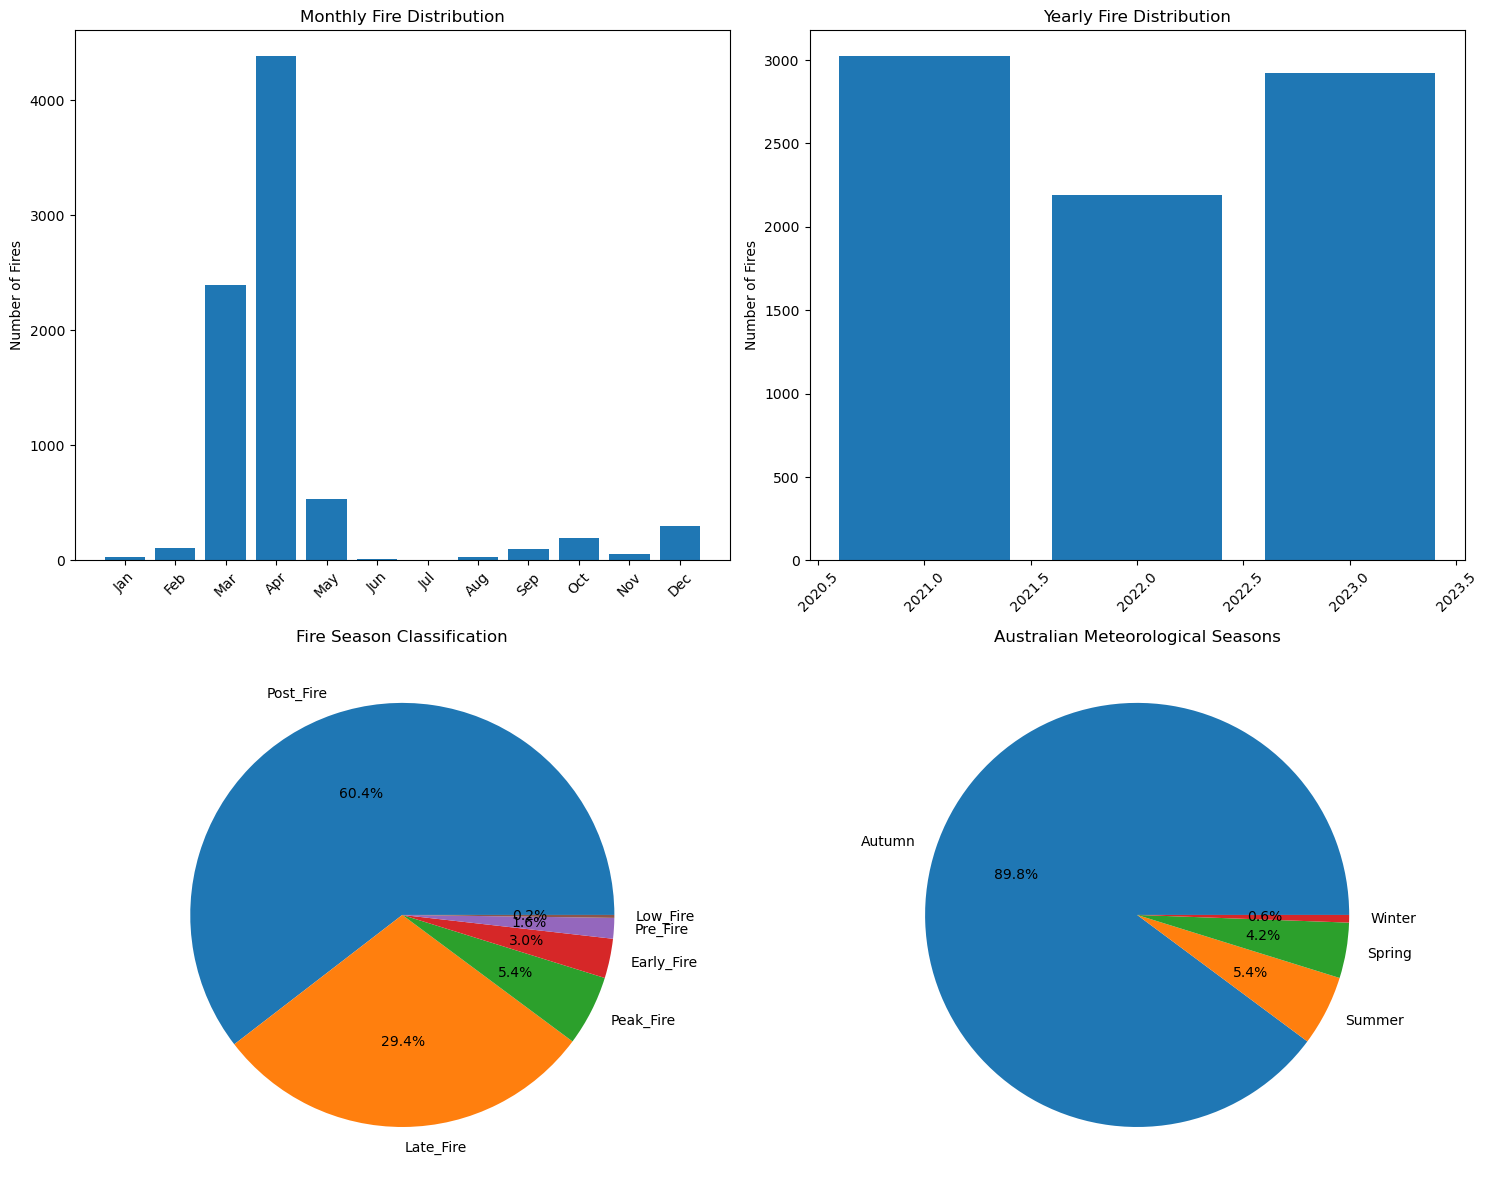

In [3]:
plot_temporal_analysis(df_analyzed)